In [ ]:
import pandas as pd

def delete_column(csv_file, column_name):
    try:
        df = pd.read_csv(csv_file) # Читаем файл
        if column_name not in df.columns:
            raise ValueError(f"Столбец '{column_name}' не найден")
        df.drop(column_name, axis=1, inplace=True) # Удаляем столбец
        df.to_csv(csv_file, index=False) # Сохраняем изменения
        print(f"Столбец '{column_name}' удален")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{csv_file}' не найден")
    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
csv_file = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\Индекс-LME.csv" #Путь к файлу
column_to_delete = "дата" #Столбец для удаления

delete_column(csv_file, column_to_delete)

Столбец 'дата' успешно удален из файла 'C:\Users\Karina\Desktop\Интенсив_3\Индекс-LME.csv'.


In [4]:
df = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\Индекс-LME.csv")
df.rename(columns={"цена": "Цена по индексу-LME"}, inplace=True)
df.to_csv(csv_file, index=False)

## Соединение:

In [5]:
train = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\train.csv")
index = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\Индекс-LME.csv")
praise = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\Цены-на-сырье.csv")
macro = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\Макропоказатели (1).csv")
download = pd.concat([train, index, praise, macro], axis=1)
download.to_csv("train_1.csv", index=False)

## Удаление пропущенных значений:

In [ ]:
import pandas as pd

def remove_sparse_columns(input_csv, output_csv, threshold=0.8):
    try:
        df = pd.read_csv(input_csv) # Читаем CSV
        na_ratios = df.isnull().sum() / len(df) # Считаем долю пропусков
        columns_to_drop = na_ratios[na_ratios > threshold].index # Определяем столбцы для удаления
        df.drop(columns=columns_to_drop, inplace=True) # Удаляем столбцы
        df.to_csv(output_csv, index=False) # Сохраняем в новый файл
        print(f"Столбцы с пропусками > {threshold * 100}% удалены. Результат в '{output_csv}'.")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
input_file = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_1.csv" # Путь к исходному файлу
output_file = "train_2.csv" # Путь к выходному файлу
threshold = 0.8 # Порог пропусков
remove_sparse_columns(input_file, output_file, threshold)

Столбцы с долей пропусков больше 80.0% удалены. Результат сохранен в 'train_2.csv'.


## Удаление строк с пропущенными значениями:

In [ ]:
import pandas as pd

def remove_sparse_rows(input_csv, output_csv, threshold=0.8):
    try:
        df = pd.read_csv(input_csv) # Читаем CSV
        na_ratios = df.isnull().sum(axis=1) / df.shape[1] # Считаем долю пропусков в строках
        rows_to_drop = na_ratios[na_ratios > threshold].index # Определяем строки для удаления
        df.drop(rows_to_drop, inplace=True) # Удаляем строки
        df.to_csv(output_csv, index=False) # Сохраняем в новый файл
        print(f"Строки с пропусками > {threshold * 100}% удалены. Результат в '{output_csv}'.")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
input_file = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_2.csv" # Путь к исходному файлу
output_file = "train_3.csv" # Путь к выходному файлу
threshold = 0.8
remove_sparse_rows(input_file, output_file, threshold)

Строки с долей пропусков больше 80.0% удалены. Результат сохранен в 'train_3.csv'.


## Обрезаем количество данных в файле train:

In [ ]:
import pandas as pd

def truncate_csv(input_csv, output_csv, num_rows=400):
    try:
        df = pd.read_csv(input_csv) # Читаем CSV
        truncated_df = df.head(num_rows) # Обрезаем DataFrame
        truncated_df.to_csv(output_csv, index=False) # Сохраняем в новый файл
        print(f"Файл '{input_csv}' обрезан до {num_rows} строк. Результат в '{output_csv}'.")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
input_file = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_3.csv" # Путь к исходному файлу
output_file = "train_4.csv" # Путь к выходному файлу
num_rows_to_keep = 400 # Количество строк для сохранения
truncate_csv(input_file, output_file, num_rows_to_keep)

Файл 'C:\Users\Karina\Desktop\Интенсив_3\train_3.csv' обрезан до 400 строк. Результат сохранен в 'train_4.csv'.


## Заполнение пропусков:

In [21]:
import pandas as pd

# Укажите путь к исходному файлу
input_file_path = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_3.csv'  
output_file_path = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_4.csv' 
# Загрузка данных из файла
data = pd.read_csv(input_file_path)

# Проверка наличия столбца "Цена на арматуру"
if 'Цена на арматуру' not in data.columns:
    raise ValueError("Столбец 'Цена на арматуру' не найден в данных.")

# Заполнение пропущенных значений средним значением столбца
mean_value = data['Цена на арматуру'].mean()
data['Цена на арматуру'] = data['Цена на арматуру'].fillna(mean_value)

# Сохранение данных с заполненными пропусками в новый файл
data.to_csv(output_file_path, index=False)

print(f"Исходные данные загружены из файла: {input_file_path}")
print(f"Данные с заполненными пропусками сохранены в файл: {output_file_path}")
print("\nДанные с заполненными пропусками:")
print(data)

Исходные данные загружены из файла: C:\Users\Karina\Desktop\Интенсив_3\train_3.csv
Данные с заполненными пропусками сохранены в файл: C:\Users\Karina\Desktop\Интенсив_3\train_4.csv

Данные с заполненными пропусками:
                      dt  Цена на арматуру  Цена по индексу-LME  \
0    2015-01-05 00:00:00         32900.000                607.0   
1    2015-01-12 00:00:00         32500.000                614.0   
2    2015-01-19 00:00:00         32000.000                615.0   
3    2015-01-26 00:00:00         30700.000                606.0   
4    2015-02-02 00:00:00         30300.000                604.0   
..                   ...               ...                  ...   
418                  NaN         39229.475                626.5   
419                  NaN         39229.475                630.0   
420                  NaN         39229.475                633.5   
421                  NaN         39229.475                634.5   
422                  NaN         39229.475     

## Выбросы:

In [ ]:
import pandas as pd

# Укажите путь к исходному файлу
input_file_path = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_4.csv'  
output_file_path = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_5.csv' 

# Загрузка данных из файла
data = pd.read_csv(input_file_path)

# Проверка наличия столбца "Цена на арматуру"
if 'Цена на арматуру' not in data.columns:
    raise ValueError("Столбец 'Цена на арматуру' не найден в данных.")

# Функция для удаления выбросов в столбце
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Удаление выбросов из столбца "Цена на арматуру"
cleaned_column = remove_outliers(data['Цена на арматуру'])

# Фильтрация исходного DataFrame по очищенным данным
cleaned_data = data.loc[cleaned_column.index]

# Сохранение очищенных данных в новый файл
cleaned_data.to_csv(output_file_path, index=False)

print(f"Исходные данные загружены из файла: {input_file_path}")
print(f"Очищенные данные сохранены в файл: {output_file_path}")
print("\nОчищенные данные:")
print(cleaned_data)

Исходные данные загружены из файла: C:\Users\Karina\Desktop\Интенсив_3\train_4.csv
Очищенные данные сохранены в файл: C:\Users\Karina\Desktop\Интенсив_3\train_5.csv

Очищенные данные:
                      dt  Цена на арматуру  Цена по индексу-LME  \
0    2015-01-05 00:00:00         32900.000                607.0   
1    2015-01-12 00:00:00         32500.000                614.0   
2    2015-01-19 00:00:00         32000.000                615.0   
3    2015-01-26 00:00:00         30700.000                606.0   
4    2015-02-02 00:00:00         30300.000                604.0   
..                   ...               ...                  ...   
418                  NaN         39229.475                626.5   
419                  NaN         39229.475                630.0   
420                  NaN         39229.475                633.5   
421                  NaN         39229.475                634.5   
422                  NaN         39229.475                635.5   

     Концен

## Дубликаты:

In [23]:
import pandas as pd

def detailed_duplicate_report(file_path, output_file='duplicates_report.csv'):
    try:
        df = pd.read_csv(file_path)
        rows_before = len(df)

        # Количество дубликатов до удаления
        duplicates_before = df.duplicated().sum()  # Подсчет дубликатов (вся строка)

        print(f"Количество строк в исходном файле: {rows_before}")
        print(f"Количество дубликатов до удаления: {duplicates_before}")

        # Удаление дубликатов
        df.drop_duplicates(inplace=True)  # Удаляем дубликаты (по умолчанию - по всем столбцам)
        rows_after = len(df)
        # Количество дубликатов после удаления
        duplicates_after = df.duplicated().sum()

        print(f"\nКоличество строк после удаления дубликатов: {rows_after}")
        print(f"Количество дубликатов после удаления: {duplicates_after}")

        # Сохранение обработанного файла
        df.to_csv(output_file, index=False)
        print(f"\nОбработанный файл сохранен в: {output_file}")

    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"Ошибка: CSV-файл пуст: {file_path}")
    except pd.errors.ParserError:
        print(f"Ошибка: Не удалось разобрать CSV-файл: {file_path}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


# Пример использования:
file_path = r'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_5.csv' 
output_file = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_6.csv'  
detailed_duplicate_report(file_path, output_file)

Количество строк в исходном файле: 401
Количество дубликатов до удаления: 0

Количество строк после удаления дубликатов: 401
Количество дубликатов после удаления: 0

Обработанный файл сохранен в: C:\Users\Karina\Desktop\Интенсив_3\train_6.csv


## Стационарность: 

--- Тест ADF (Исходный ряд) ---
Статистика ADF: -1.717285
p-значение: 0.422229
	1%: -3.447
	5%: -2.869
	10%: -2.571
--- Тест ADF (Стационарный ряд) ---
Статистика ADF: -7.827554
p-значение: 0.000000
	1%: -3.447
	5%: -2.869
	10%: -2.571
Стационарный ряд сохранен в: C:\Users\Karina\Desktop\Интенсив_3\train_clean.csv


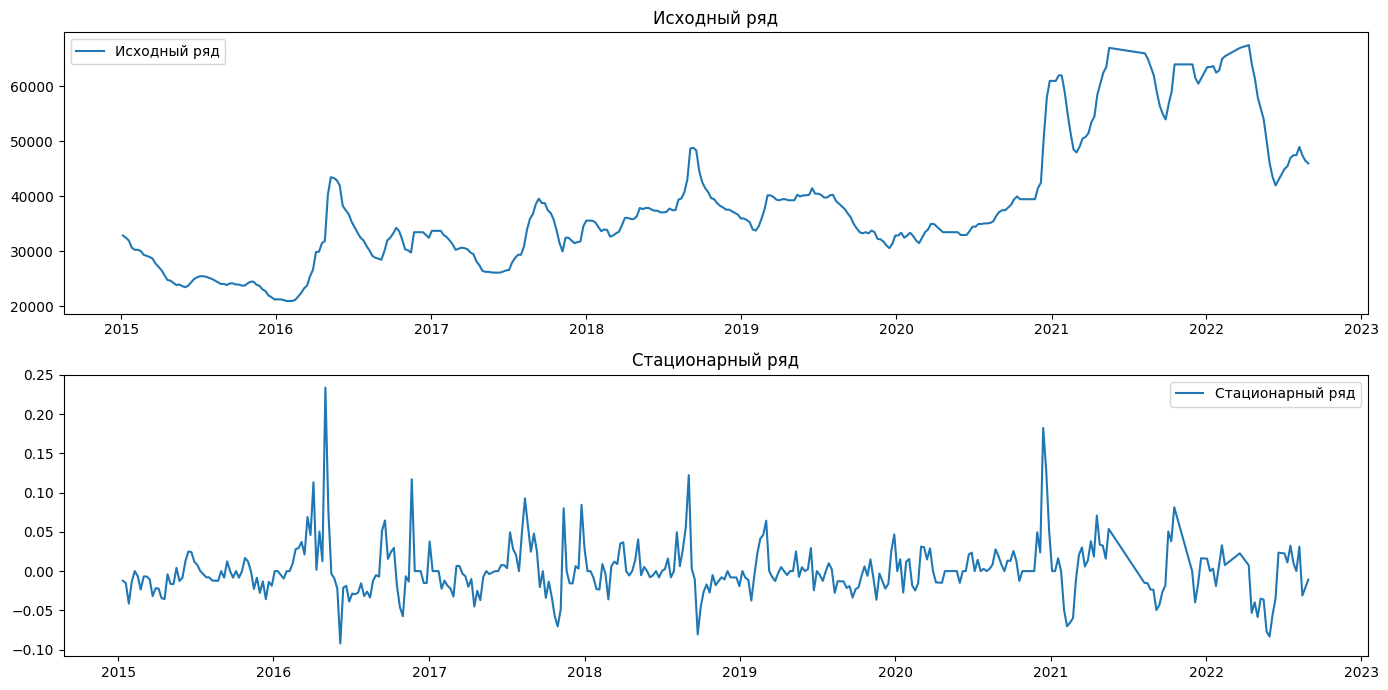

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def make_stationary_with_comparison(input_filepath, output_filepath, column_name, method='diff', diff_order=1):
    """
    Преобразовать временной ряд в стационарный и сохранить результаты с сравнением.
    """

    def load_and_extract(filepath, column):
        """Загрузить данные и извлечь временной ряд."""
        try:
            data = pd.read_csv(filepath, index_col='dt', parse_dates=['dt'])  # Загрузка CSV
            series = data[column].dropna()  # Удаление пропущенных значений
            return series
        except Exception as e:
            print(f"Ошибка при загрузке данных: {e}")
            return None

    def adf_test(series, title="Тест ADF"):
        """Провести тест ADF и распечатать результаты."""
        print(f"--- {title} ---")
        result = adfuller(series.dropna())
        print('Статистика ADF: %f' % result[0])
        print('p-значение: %f' % result[1])
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

    def make_stationary(series, method='diff', diff_order=1):
        """Преобразовать временной ряд в стационарный, используя указанный метод."""
        series = series.copy()  # Создание копии

        try:
            if method == 'diff':
                for i in range(diff_order):
                    series = series.diff().dropna()  # Разностное преобразование
            elif method == 'log_diff':
                series = np.log(series)  # Логарифмическое преобразование
                for i in range(diff_order):
                    series = series.diff().dropna()
            elif method == 'boxcox_diff':
                from scipy.stats import boxcox
                series, lambda_value = boxcox(series + 1e-9)  # Преобразование Бокса-Кокса
                for i in range(diff_order):
                    series = series.diff().dropna()
            else:
                print("Ошибка: Неизвестный метод.")
                return series  

            return series

        except Exception as e:
            print(f"Произошла ошибка: {e}")
            return series  

    original_series = load_and_extract(input_filepath, column_name)
    if original_series is None:
        return  

    adf_test(original_series, title="Тест ADF (Исходный ряд)")

    stationary_series = make_stationary(original_series.copy(), method=method, diff_order=diff_order)
    if stationary_series is None or stationary_series.equals(original_series):
        print("Не удалось сделать ряд стационарным.")
        return

    adf_test(stationary_series, title="Тест ADF (Стационарный ряд)")

    try:
        stationary_series.to_csv(output_filepath, header=[column_name])  # Сохранение в CSV
        print(f"Стационарный ряд сохранен в: {output_filepath}")
    except Exception as e:
        print(f"Ошибка при сохранении стационарного ряда: {e}")

    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(original_series, label="Исходный ряд")  # Построение графика исходного ряда
    plt.title("Исходный ряд")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(stationary_series, label="Стационарный ряд")  # Построение графика стационарного ряда
    plt.title("Стационарный ряд")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Пример использования:
input_filepath = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_6.csv"  # Путь к входному файлу
output_filepath = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_clean.csv"  # Путь к выходному файлу
column_name = "Цена на арматуру"  # Название колонки
method = 'log_diff'  # Метод разности
diff_order = 1  # Порядок разности

make_stationary_with_comparison(input_filepath, output_filepath, column_name, method, diff_order)


## Проверка на стационарность:

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationarity(filepath, column_name):
    try:
        df = pd.read_csv(filepath) # Читаем CSV
        if column_name not in df.columns:
            print(f"Ошибка: Столбец '{column_name}' не найден.")
            return None
        series = df[column_name].dropna() # Извлекаем столбец, удаляем NaN
        result = adfuller(series) # Тест ADF
        results = {
            'adf_statistic': result[0],
            'p_value': result[1],
            'critical_values': result[4],
            'is_stationary': result[1] <= 0.05 # Стационарен, если p-value <= 0.05
        }
        return results
    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути '{filepath}'.")
        return None
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return None

# Пример использования:
filepath = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_clean.csv" # Путь к файлу
column_name = "Цена на арматуру" # Имя столбца

stationarity_results = check_stationarity(filepath, column_name)

if stationarity_results:
    print("Результаты теста ADF:")
    print(f"  ADF Statistic: {stationarity_results['adf_statistic']}")
    print(f"  p-value: {stationarity_results['p_value']}")
    print("  Critical Values:")
    for level, value in stationarity_results['critical_values'].items():
        print(f"    {level}: {value}")

    if stationarity_results['is_stationary']:
        print("Ряд стационарен на уровне значимости 0.05.")
    else:
        print("Ряд не стационарен на уровне значимости 0.05.")
else:
    print("Не удалось проверить стационарность.")

Результаты теста ADF:
  ADF Statistic: -7.827553573574149
  p-value: 6.4210833417829686e-12
  Critical Values:
    1%: -3.44714244478345
    5%: -2.8689414326247995
    10%: -2.5707127699396084
Ряд стационарен на уровне значимости 0.05.


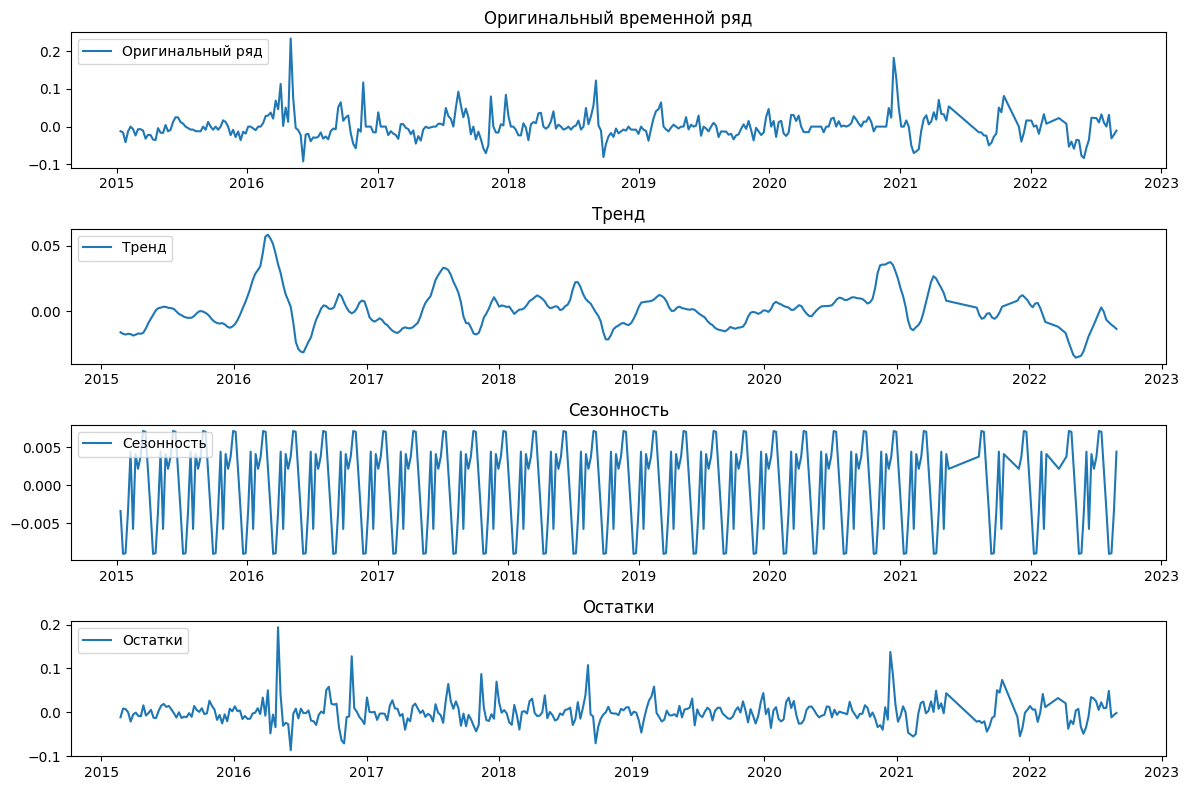


1. **Оригинальный временной ряд**: Это исходные данные, которые мы анализируем.
2. **Тренд**: Это долгосрочное направление данных, которое показывает общее движение ряда вверх или вниз.
3. **Сезонность**: Это повторяющиеся паттерны в данных, которые происходят с фиксированной периодичностью (например, ежегодно, ежеквартально).
4. **Остатки**: Это случайные колебания, которые не объясняются трендом или сезонностью. Они могут быть вызваны случайными событиями или ошибками в данных.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Загрузка данных
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Интенсив_3\\train_clean.csv', parse_dates=['dt'], index_col='dt')

# Выбор столбца для анализа (например, 'Цена на арматуру')
ts = data['Цена на арматуру']

# Декомпозиция временного ряда
decomposition = seasonal_decompose(ts, model='additive', period=12)  # period=12 для месячных данных

# Построение графиков
plt.figure(figsize=(12, 8))

# Оригинальный временной ряд
plt.subplot(411)
plt.plot(ts, label='Оригинальный ряд')
plt.legend(loc='upper left')
plt.title('Оригинальный временной ряд')

# Тренд
plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend(loc='upper left')
plt.title('Тренд')

# Сезонность
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend(loc='upper left')
plt.title('Сезонность')

# Остатки (шум)
plt.subplot(414)
plt.plot(decomposition.resid, label='Остатки')
plt.legend(loc='upper left')
plt.title('Остатки')

plt.tight_layout()
plt.show()

# Пояснение
print("""
1. **Оригинальный временной ряд**: Это исходные данные, которые мы анализируем.
2. **Тренд**: Это долгосрочное направление данных, которое показывает общее движение ряда вверх или вниз.
3. **Сезонность**: Это повторяющиеся паттерны в данных, которые происходят с фиксированной периодичностью (например, ежегодно, ежеквартально).
4. **Остатки**: Это случайные колебания, которые не объясняются трендом или сезонностью. Они могут быть вызваны случайными событиями или ошибками в данных.
""")